## Stock Prediction Framework: Timeseries

### packages

In [2]:
import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

### read and preminant time series analysis

In [3]:
df = pd.read_csv("./training_and_test/yahoo_stock.csv")
#df.set_index('Date', inplace=True)
df['Daily_returns'] = df['Adj Close'].pct_change()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Daily_returns
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,NaN
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,0.001222
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,-0.000129
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,0.000000
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,0.000594


### plot and split to train and test, 70% to 30%

(1825, 8)
(1278, 8)
(547, 8)


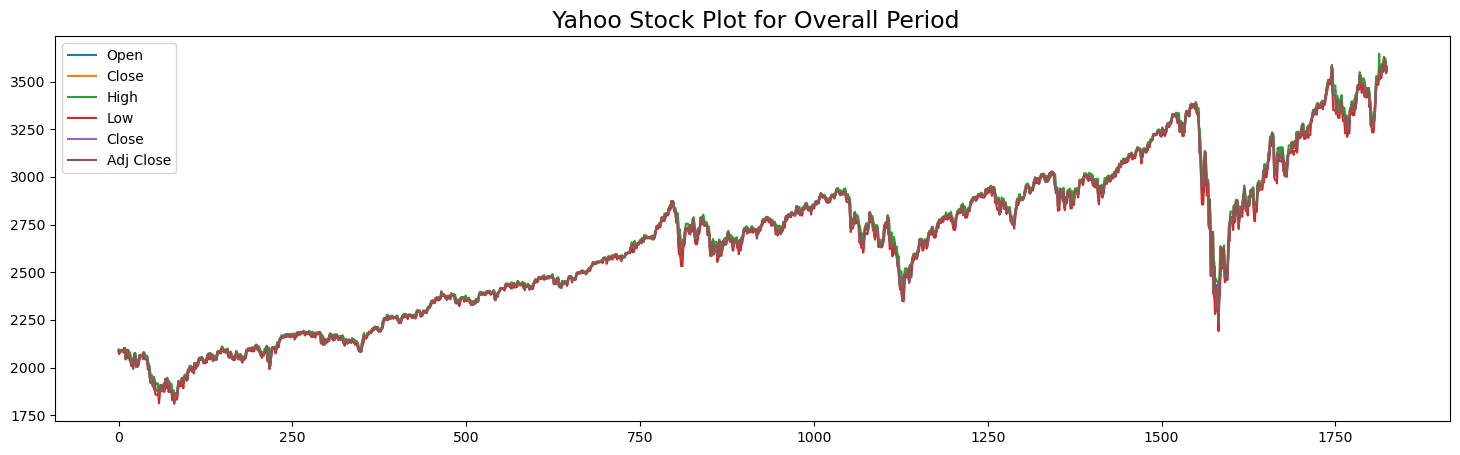

In [4]:
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Yahoo Stock Plot for Overall Period", fontsize=17)

test_pct = 0.3
train = df.iloc[:int(len(df)*(1-test_pct))+1,:]
test = df.iloc[int(len(df)*(1-test_pct))+1:,:]

print(df.shape)
print(train.shape)
print(test.shape)

## Time Series Analysis: Naive 
naive, 朴素法， 即所有的预测值等于所选择时间序列的最后一个值

In [9]:
y_hat = test[['Date','Close']].copy()   # copy of the close price of the origninal input
y_hat['Naive'] = train.loc[len(train)-1,'Close']
print(y_hat.head(10))

plt.figure(figsize = (12,8))

            Date        Close       Naive
1278  2019-05-24  2826.060059  2822.23999
1279  2019-05-25  2826.060059  2822.23999
1280  2019-05-26  2826.060059  2822.23999
1281  2019-05-27  2826.060059  2822.23999
1282  2019-05-28  2802.389893  2822.23999
1283  2019-05-29  2783.020020  2822.23999
1284  2019-05-30  2788.860107  2822.23999
1285  2019-05-31  2752.060059  2822.23999
1286  2019-06-01  2752.060059  2822.23999
1287  2019-06-02  2752.060059  2822.23999


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

简单平均

指数平滑

移动平均